<a href="https://colab.research.google.com/github/gregroudoudou/M1-Programmation-/blob/main/KOEBEL_Comptageeffetsmarginaux_de_r%C3%A9compensesapartirscore_avec_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poisson Regression:

We are buildling a Poisson regression model on the **student awards** dataset. The dataset contains two variables - awards won and math score.

In [ ]:
# 1) Importez la fonction de t√©l√©versement de fichiers
from google.colab import files

# 2) T√©l√©versez le fichier CSV local
uploaded = files.upload()

# 3) Importez pandas pour manipuler les DataFrames
import pandas as pd
import io

# 4) Get the uploaded filename
uploaded_filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# 5) Chargez le CSV dans un DataFrame
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]), sep=',', header=0)

# 6) V√©rifiez le contenu
df.head()


Saving competition_awards_data.csv to competition_awards_data (3).csv


Awards  Math Score
0       0          43
1       0          38
2       0          41
3       0          33
4       0          39

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#fetching data
df = pd.read_csv(r"/kaggle/input/award-competition/competition_awards_data.csv",  sep = ',', header= 0 )
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/award-competition/competition_awards_data.csv'

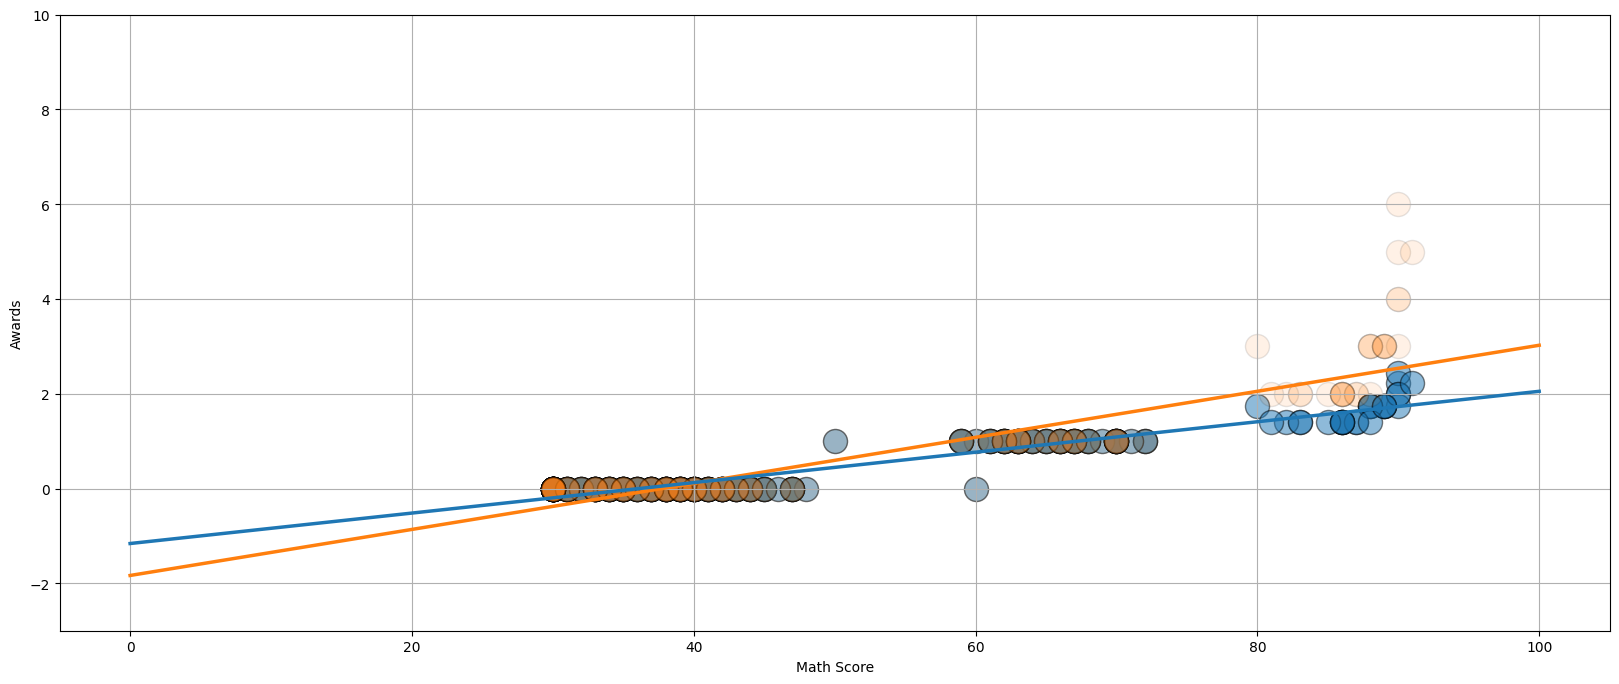

In [ ]:
# plotting transformed awards agains Math score
df['Awards_transformed']=df['Awards']**(1/2)

fig, ax = plt.subplots(figsize=(20,8))
plt.grid()
ax.set_ylim((-3,10))
ax.set_ylabel("Awards")
ax.set_xlabel("Math Score")
ax.scatter( df['Math Score'],df.Awards_transformed, alpha=0.5,s=300,edgecolors="k")
ax.scatter( df['Math Score'],df.Awards, alpha=0.1,s=300,edgecolors="k")

# Fitting data
xseq = np.linspace(0, 100, num=1000)
b, a = np.polyfit(df['Math Score'], df['Awards'], deg=1)
B, A = np.polyfit(df['Math Score'], df['Awards_transformed'], deg=1)

# Plot regression line, original
ax.plot(xseq, a + b * xseq, color='tab:orange', lw=2.5);
# Plot regression line, transformed
ax.plot(xseq, A + B * xseq, color='tab:blue',lw=2.5);
plt.show()

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson # Importing the poisson object from scipy.stats


# 2) Extraction de la colonne "Awards"
awards = df["Awards"].values

# 3) Estimation du param√®tre lambda (Œª) de la loi de Poisson
#    La moyenne empirique est l'estimateur le plus courant de Œª
lambda_estime = np.mean(awards)
print(f"Valeur moyenne estim√©e (Œª) : {lambda_estime:.2f}")

# 4) Comptage du nombre d‚Äôoccurrences pour chaque valeur (observ√©e)
valeurs_uniques, comptages_observes = np.unique(awards, return_counts=True)

# 5) Calcul des probabilit√©s th√©oriques de la loi de Poisson(Œª_estime)
#    pour les m√™mes valeurs
prob_theoriques = poisson.pmf(valeurs_uniques, mu=lambda_estime)

# 6) Pour comparer la distribution observ√©e et la distribution Poisson,
#    on transforme les probabilit√©s th√©oriques en comptages th√©oriques
#    en les multipliant par le nombre total de donn√©es
comptages_theoriques = prob_theoriques * len(awards)

# 7) Affichage compar√© des valeurs observ√©es et th√©oriques
plt.figure(figsize=(8, 5))
plt.bar(valeurs_uniques - 0.2, comptages_observes, width=0.4, label='Observ√©', alpha=0.7)
plt.bar(valeurs_uniques + 0.2, comptages_theoriques, width=0.4, label='Poisson th√©orique', alpha=0.7)
plt.xlabel('Nombre de r√©compenses (Awards)')
plt.ylabel('Fr√©quence')
plt.title('Comparaison de la distribution observ√©e et de la loi de Poisson')
plt.legend()
plt.show()

# 8) G√©n√©ration de valeurs al√©atoires selon la loi de Poisson
#    (par exemple, pour simuler 1000 observations)
valeurs_simulees = poisson.rvs(mu=lambda_estime, size=1000, random_state=42)

# Affiche un histogramme des valeurs simul√©es
plt.hist(valeurs_simulees, bins=range(0, max(valeurs_simulees)+2), alpha=0.7, edgecolor='black')
plt.xlabel('Valeurs simul√©es')
plt.ylabel('Fr√©quence')
plt.title(f'Simulation selon la loi de Poisson(Œª = {lambda_estime:.2f})')
plt.show()

Valeur moyenne estim√©e (Œª) : 0.63


e graphique montre la r√©partition d‚Äôun grand nombre de valeurs simul√©es selon une loi de Poisson dont le param√®tre
ùúÜ
‚âà
0,63
Œª‚âà0,63. Voici ce que l‚Äôon peut en retenir :

Majorit√© de z√©ros et de 1
√âtant donn√© que
ùúÜ
<
1
Œª<1, la probabilit√© de g√©n√©rer
0
0 ou
1
1 √©v√©nement est nettement plus √©lev√©e que celle d‚Äôen g√©n√©rer davantage. Sur l‚Äôhistogramme, on voit clairement que les classes
0
0 et
1
1 repr√©sentent l‚Äôessentiel des observations.

Faible occurrence des valeurs √©lev√©es
Au fur et √† mesure que la valeur s‚Äô√©loigne de
ùúÜ
Œª, la fr√©quence baisse rapidement (barres pour 2, 3, 4, 5 quasi inexistantes par comparaison). Cela traduit bien la nature de la Poisson : avec une moyenne faible (
ùúÜ
‚âà
0.63
Œª‚âà0.63), la probabilit√© d‚Äôavoir 2, 3 (ou plus) occurrences d√©cro√Æt tr√®s vite.

Distribution discr√®te
La loi de Poisson est une distribution de variables al√©atoires discr√®tes. Les barres ne sont pr√©sentes qu‚Äôaux valeurs enti√®res (0, 1, 2, 3, etc.).

Coh√©rence avec
ùúÜ
Œª
La forme observ√©e (un pic tr√®s prononc√© √† 0, puis moins de 1, et tr√®s peu de 2 ou plus) correspond exactement √† ce √† quoi on s‚Äôattend pour
ùúÜ
‚âà
0.6
Œª‚âà0.6. On peut le quantifier :

ùëÉ
(
ùëã
=
0
)
‚âà
ùëí
‚àí
0.63
‚âà
0.53
,
ùëÉ
(
ùëã
=
1
)
‚âà
0.63
‚ãÖ
ùëí
‚àí
0.63
‚âà
0.33
‚Ä¶
P(X=0)‚âàe
‚àí0.63
 ‚âà0.53,P(X=1)‚âà0.63‚ãÖe
‚àí0.63
 ‚âà0.33‚Ä¶
On voit bien que pr√®s de 53‚ÄØ% des fois on obtient 0, et environ 33‚ÄØ% des fois 1, ce qui laisse moins de 15‚ÄØ% pour tous les autres r√©sultats combin√©s (2, 3, 4, etc.).

En r√©sum√©, l‚Äôhistogramme illustre exactement la concentration des r√©sultats autour de 0 et 1, caract√©ristique d‚Äôune loi de Poisson √† moyenne inf√©rieure √† 1.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des donn√©es
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable d√©pendante (ex : nombre de r√©compenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) D√©finition d'un mod√®le OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable d√©pendante
#    - Math_Score : variable ind√©pendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math Score", data=df)

# 3) Ajustement du mod√®le
results = model.fit()

# 4) R√©sum√© des r√©sultats
print(results.summary())

# 5) R√©cup√©ration du coefficient (effet marginal dans un mod√®le lin√©aire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estim√© de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un mod√®le lin√©aire : Awards = Œ≤0 + Œ≤1 * Math_Score + Œµ
# - Œ≤1 (Math_Score) repr√©sente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unit√©, toutes choses √©gales par ailleurs.
#
# => L'¬´ effet marginal ¬ª d'une unit√© de Math_Score est donc exactement Œ≤1.
################################################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des donn√©es
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable d√©pendante (ex : nombre de r√©compenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) D√©finition d'un mod√®le OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable d√©pendante
#    - Math_Score : variable ind√©pendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du mod√®le
results = model.fit()

# 4) R√©sum√© des r√©sultats
print(results.summary())

# 5) R√©cup√©ration du coefficient (effet marginal dans un mod√®le lin√©aire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estim√© de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un mod√®le lin√©aire : Awards = Œ≤0 + Œ≤1 * Math_Score + Œµ
# - Œ≤1 (Math_Score) repr√©sente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unit√©, toutes choses √©gales par ailleurs.
#
# => L'¬´ effet marginal ¬ª d'une unit√© de Math_Score est donc exactement Œ≤1.
################################################################################
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des donn√©es
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable d√©pendante (ex : nombre de r√©compenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) D√©finition d'un mod√®le OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable d√©pendante
#    - Math_Score : variable ind√©pendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du mod√®le
results = model.fit()

# 4) R√©sum√© des r√©sultats
print(results.summary())

# 5) R√©cup√©ration du coefficient (effet marginal dans un mod√®le lin√©aire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estim√© de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un mod√®le lin√©aire : Awards = Œ≤0 + Œ≤1 * Math_Score + Œµ
# - Œ≤1 (Math_Score) repr√©sente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unit√©, toutes choses √©gales par ailleurs.
#
# => L'¬´ effet marginal ¬ª d'une unit√© de Math_Score est donc exactement Œ≤1.
################################################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des donn√©es
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable d√©pendante (ex : nombre de r√©compenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) D√©finition d'un mod√®le OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable d√©pendante
#    - Math_Score : variable ind√©pendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du mod√®le
results = model.fit()

# 4) R√©sum√© des r√©sultats
print(results.summary())

# 5) R√©cup√©ration du coefficient (effet marginal dans un mod√®le lin√©aire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estim√© de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un mod√®le lin√©aire : Awards = Œ≤0 + Œ≤1 * Math_Score + Œµ
# - Œ≤1 (Math_Score) repr√©sente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unit√©, toutes choses √©gales par ailleurs.
#
# => L'¬´ effet marginal ¬ª d'une unit√© de Math_Score est donc exactement Œ≤1.
################################################################################
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des donn√©es
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable d√©pendante (ex : nombre de r√©compenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) D√©finition d'un mod√®le OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable d√©pendante
#    - Math_Score : variable ind√©pendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du mod√®le
results = model.fit()

# 4) R√©sum√© des r√©sultats
print(results.summary())

# 5) R√©cup√©ration du coefficient (effet marginal dans un mod√®le lin√©aire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estim√© de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un mod√®le lin√©aire : Awards = Œ≤0 + Œ≤1 * Math_Score + Œµ
# - Œ≤1 (Math_Score) repr√©sente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unit√©, toutes choses √©gales par ailleurs.
#
# => L'¬´ effet marginal ¬ª d'une unit√© de Math_Score est donc exactement Œ≤1.
################################################################################

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des donn√©es
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable d√©pendante (ex : nombre de r√©compenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) D√©finition d'un mod√®le OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable d√©pendante
#    - Math_Score : variable ind√©pendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du mod√®le
results = model.fit()

# 4) R√©sum√© des r√©sultats
print(results.summary())

# 5) R√©cup√©ration du coefficient (effet marginal dans un mod√®le lin√©aire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estim√© de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un mod√®le lin√©aire : Awards = Œ≤0 + Œ≤1 * Math_Score + Œµ
# - Œ≤1 (Math_Score) repr√©sente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unit√©, toutes choses √©gales par ailleurs.
#
# => L'¬´ effet marginal ¬ª d'une unit√© de Math_Score est donc exactement Œ≤1.
################################################################################
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1) Lecture des donn√©es
#    On suppose que le CSV contient au moins 2 colonnes :
#      - Awards       : la variable d√©pendante (ex : nombre de r√©compenses)
#      - Math_Score   : une variable explicative (ex : score en maths)

df = pd.read_csv("competition_awards_data.csv")

# 2) D√©finition d'un mod√®le OLS (MCO) avec la formule "Awards ~ Math_Score"
#    - Awards   : variable d√©pendante
#    - Math_Score : variable ind√©pendante
# Replace 'Math_Score' with 'Math Score' in the formula
model = smf.ols("Awards ~ Math_Score", data=df)

# 3) Ajustement du mod√®le
results = model.fit()

# 4) R√©sum√© des r√©sultats
print(results.summary())

# 5) R√©cup√©ration du coefficient (effet marginal dans un mod√®le lin√©aire)
beta_math = results.params['Math_Score']
print(f"Effet marginal estim√© de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

################################################################################
# INTERPRETATION :
# Dans un mod√®le lin√©aire : Awards = Œ≤0 + Œ≤1 * Math_Score + Œµ
# - Œ≤1 (Math_Score) repr√©sente la variation moyenne de 'Awards' lorsque 'Math_Score'
#   augmente de 1 unit√©, toutes choses √©gales par ailleurs.
#
# => L'¬´ effet marginal ¬ª d'une unit√© de Math_Score est donc exactement Œ≤1.
################################################################################

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv("competition_awards_data.csv")

# Renommer la colonne dans le DataFrame
df.rename(columns={'Math Score': 'Math_Score'}, inplace=True)

# Vous pouvez alors utiliser la formule sans espace
model = smf.ols("Awards ~ Math_Score", data=df)
results = model.fit()
print(results.summary())

beta_math = results.params['Math_Score']
print(f"Effet marginal estim√© de 'Math_Score' sur 'Awards' = {beta_math:.4f}")

import pandas as pd
import statsmodels.formula.api as smf
from patsy import dmatrices

df = pd.read_csv("competition_awards_data.csv")

# Utilisation de Q(...) pour √©chapper un nom de variable avec espace
model = smf.ols("Awards ~ Q('Math Score')", data=df)
results = model.fit()
print(results.summary())

# Pour extraire le coefficient :
beta_math = results.params["Q('Math Score')"]
print(f"Effet marginal estim√© de 'Math Score' sur 'Awards' = {beta_math:.4f}")


                            OLS Regression Results                            
Dep. Variable:                 Awards   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     704.7
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           3.77e-67
Time:                        14:07:12   Log-Likelihood:                -141.88
No. Observations:                 200   AIC:                             287.8
Df Residuals:                     198   BIC:                             294.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8340      0.099    -18.491      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# 2) Sp√©cification du mod√®le Poisson
poisson_model = smf.glm(
    formula="Awards ~ Math_Score",
    data=df,
    family=sm.families.Poisson()
)

# 3) Ajustement
poisson_results = poisson_model.fit()
print(poisson_results.summary())

# 4) Effets marginaux (m√©thode int√©gr√©e)
marginal_effects = poisson_results.get_margeff()
print(marginal_effects.summary())

# 5) Calcul manuel de l'effet marginal moyen
beta_math = poisson_results.params['Math_Score']
yhat = poisson_results.predict(df)
marginal_individual = beta_math * yhat
marginal_mean = np.mean(marginal_individual)

print(f"Coefficient 'Math_Score' (Œ≤1) = {beta_math:.4f}")
print(f"Effet marginal moyen = {marginal_mean:.4f}")


PatsyError: Error evaluating factor: NameError: name 'Math_Score' is not defined
    Awards ~ Math_Score
             ^^^^^^^^^^

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# 1) Lecture du CSV
df = pd.read_csv("competition_awards_data.csv")

# V√©rification des noms de colonnes
print("Colonnes avant renommage :", df.columns)

# 2) Renommer la colonne "Math Score" en "Math_Score"
df.rename(columns={"Math Score": "Math_Score"}, inplace=True)

# V√©rification apr√®s renommage
print("Colonnes apr√®s renommage :", df.columns)

# 3) Sp√©cification du mod√®le de Poisson
#    Awards : variable d√©pendante
#    Math_Score : variable explicative
poisson_model = smf.glm(
    formula="Awards ~ Math_Score",
    data=df,
    family=sm.families.Poisson()
)

# 4) Ajustement (fit) du mod√®le
poisson_results = poisson_model.fit()
print("\n=== R√©sum√© du mod√®le Poisson ===")
print(poisson_results.summary())

# 5) Calcul de l'effet marginal
#
# Par d√©faut, get_margeff() calcule l'Average Marginal Effect (AME).
# Dans un mod√®le Poisson (lien log), l'effet marginal de Math_Score
# sur E(Awards) d√©pend de la valeur de exp(XŒ≤). get_margeff() moyenne
# ces effets sur toutes les observations.

marginal_effects = poisson_results.get_margeff()
print("\n=== Effets marginaux (get_margeff) ===")
print(marginal_effects.summary())

# 6) Calcul manuel de l'effet marginal moyen (AME)
#    E(Y|X) = exp(Œ≤0 + Œ≤1*Math_Score)
#    Effet marginal = ‚àÇE(Y)/‚àÇX = Œ≤1 * exp(Œ≤0 + Œ≤1*Math_Score)
#    => Pour l'individu i, c'est Œ≤1 * E(Y_i).
#    => On peut en prendre la moyenne (AME).

beta_math = poisson_results.params['Math_Score']  # coefficient Œ≤1
yhat = poisson_results.predict(df)                # pr√©diction E(Y|X) = exp(XŒ≤)
marginal_individual = beta_math * yhat            # effet marginal par individu
marginal_mean = np.mean(marginal_individual)      # moyenne

print(f"\nCoefficient 'Math_Score' (Œ≤1) = {beta_math:.4f}")
print(f"Effet marginal moyen (AME) = {marginal_mean:.4f}")


Colonnes avant renommage : Index(['Awards', 'Math Score'], dtype='object')
Colonnes apr√®s renommage : Index(['Awards', 'Math_Score'], dtype='object')

=== R√©sum√© du mod√®le Poisson ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.94
Date:                Tue, 11 Mar 2025   Deviance:                       39.816
Time:                        14:15:16   Pearson chi2:                     36.1
No. Iterations:                     6   Pseudo R-squ. (CS):             0.7104
Covariance Type:            nonrobust                                         
                 coef 